# Analysing World Happiness Data from 2015-2019

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2020 for the first time ranks cities around the world by their subjective well-being and digs more deeply into how the social, urban and natural environments combine to affect our happiness.
 


# Description of columns present in the datasets.

1) Happiness Rank- Rank of any country in a particular year.

2) Country- Name of the country

3) Score- Happiness score as the sum of all numerical columns in the datasets

4) Corr_perception- A quantification of the people's perceived trust in their governments.

5) Generosity- Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

6) Social Support- Metric estimating satisfaction of people with their friends and family.

7) Freedom- Perception of freedom quantified

8) Dystopia- Hypothetically the saddest country in the world.

To obtain more information about these datasets, you can check this [Kaggle Profile](https://www.kaggle.com/unsdsn/world-happiness).

To check out the original report, visit [this link](https://worldhappiness.report/)

In [2]:
#installing the jovian library
!pip install jovian

     |████████████████████████████████| 65 kB 347 kB/s eta 0:00:011
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=c33f6501a77cad96caca3b5bd59798089a577f904b1ca5bc42b2639a4c595473
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#importing the libraries required for visualisation
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<IPython.core.display.Javascript object>

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2019.csv


In [4]:
#loading the datasets y1,y2,y3 corresponding to 2017,2018 and 2019
y1_df=pd.read_csv('/kaggle/input/world-happiness/2017.csv',index_col=1)
y2_df=pd.read_csv('/kaggle/input/world-happiness/2015.csv',index_col=2)
y3_df=pd.read_csv('/kaggle/input/world-happiness/2019.csv',index_col=0)

Have a look at the datasets and the columns

In [74]:
y1_df.head()

,Country,Score,GDP_per_capita,Family,life_expectancy,Freedom,Generosity,corr_perception,dystopia_residual
Happiness.Rank,,,,,,,,,
1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [76]:
y2_df.head()

,Country,Region,Score,Economy (GDP per Capita),Social support,life_expectancy,Freedom,Trust (Government Corruption),Generosity,dystopia_residual
Happiness Rank,,,,,,,,,,
1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [77]:
y3_df.head()

,Country,Score,GDP_per_capita,Social support,life_expectancy,Freedom,Generosity,corr_perception
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Each numerical value in a row of any of the above dataset contributes to the happiness score of the corresponding country.

In [5]:
y1_df.drop(['Whisker.low','Whisker.high'],axis=1,inplace=True)

In [6]:
#renaming columns in y1 for convenience
y1_col={'Country':'Country','Happiness.Rank':'rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP_per_capita','Family':'Family','Health..Life.Expectancy.':'life_expectancy','Freedom':'Freedom','Generosity':'Generosity','Trust..Government.Corruption.':'corr_perception','Dystopia.Residual':'dystopia_residual'}
y1_df.rename(columns=y1_col,inplace=True)

In [69]:
#renaming in y2
y2_col={'Country':'Country','Happiness Score':'Score','Economy (GDP per capita)':'GDP_per_capita','Family':'Social support','Health (Life Expectancy)':'life_expectancy','Freedom':'Freedom','Trust (Government corruption)':'corr_perception','Generosity':'Generosity','Dystopia Residual':'dystopia_residual'}
y2_df.rename(columns=y2_col,inplace=True)

In [8]:
#renaming in y3
y3_col={'Overall rank':'rank','Country or region':'Country','Score':'Score','GDP per capita':'GDP_per_capita','Social support':'Social support','Healthy life expectancy':'life_expectancy','Freedom to make life choices':'Freedom','Generosity':'Generosity','Perceptions of corruption':'corr_perception'}
y3_df.rename(columns=y3_col,inplace=True)

**EXPLAINING THE DYSTOPIA RESIDUAL METRIC**

**DYSTOPIA RESIDUAL** : Dystopia is a hypothetical country consisting of the least happy people. It was formed so as to create a benchmark to compare Happiness Scores of other countries with it. 
The Dystopia Residual is calculated as (Score of Dystopia+ **Residual** for the corresponding country). Here the Residual is a value generated for each country, which indicates if the 6 variables have under or over explained the life evaluations for each country for that particular year.

In [9]:
#setting a darkgrid style for each visualisation
sns.set_style("darkgrid")
project_name='World Happiness Report'

# **Distribution of scores across different countries**

Have people been relatively more happier in coming years?

Text(0.5, 1.0, 'Distribution of Happiness scores across 2015,2017')

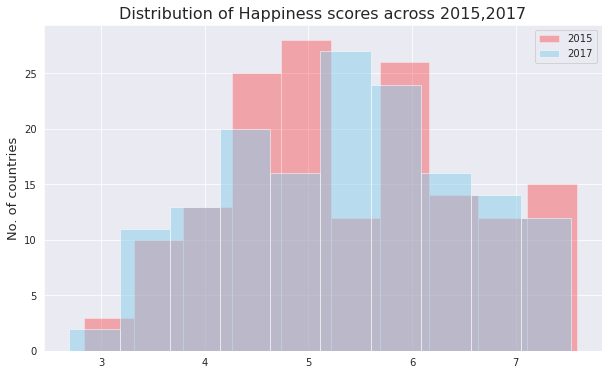

In [10]:
#for 2015 and 2017
plt.figure(figsize=(10,6))
a=10
plt.hist(y2_df.Score,a,label='2015',alpha=0.3,color='red')
plt.hist(y1_df.Score,a,label='2017',alpha=0.5,color='skyblue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title("Distribution of Happiness scores across 2015,2017",size=16)

As observed from the stacked histogram, we find that the extremum values have slightly shifted to the left, we can conclude that living standards had hit a new low in 2017. Meanwhile,we observe a significant increase in the number of countries having a score ranging from 5-6 in 2017 as compared to 2015, which shows a lower number. 

We can safely conlcude that the moderately happy countries became happier in 2017 and the living standards at the extremums fell to some extent.

Text(0.5, 1.0, 'Distribution of Happiness scores across 2017,2019')

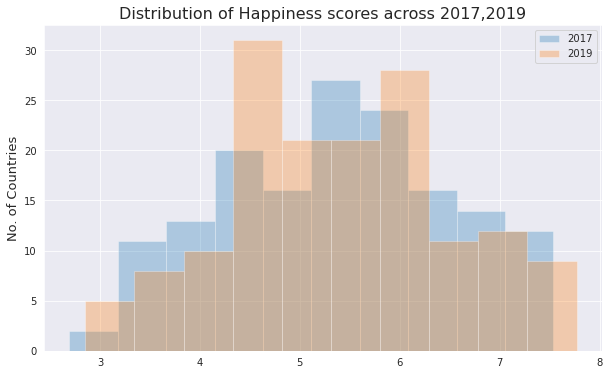

In [11]:
#for 2017 and 2019
plt.figure(figsize=(10,6))
b=10
plt.hist(y1_df.Score,b,label='2017',alpha=0.3)
plt.hist(y3_df.Score,b,label='2019',alpha=0.3)
plt.ylabel("No. of Countries",size=13)
plt.legend(loc="upper right")
plt.title('Distribution of Happiness scores across 2017,2019',size=16)

The stacked histogram plotted above shows that there has been an increase in the happines score at the extremums as there appears to be a shift to the right in the year 2019. A significant increase in the number of countries with score between 4-5 has been observed. This may signify relatively better living standards and satisfaction of the people with their lives and the government in 2019.

We can conclude that people have been happier in 2019 as compared to 2017.

# **Correlating features with the happiness scores**

Is there a strong relation between happiness scores of a country and its economic and legal state?

To answer this we will find out the correlation values between Happiness Scores and:
1. corr_perception
2. GDP_per_capita
3. Freedom

across the three datasets.

In [12]:
#correlation values for 2015 dataset
#creating a copy of the dataset with 4 columns.
y2=y2_df.copy()
y2.drop(['Social support','life_expectancy','Generosity','dystopia_residual'],axis=1,inplace=True)


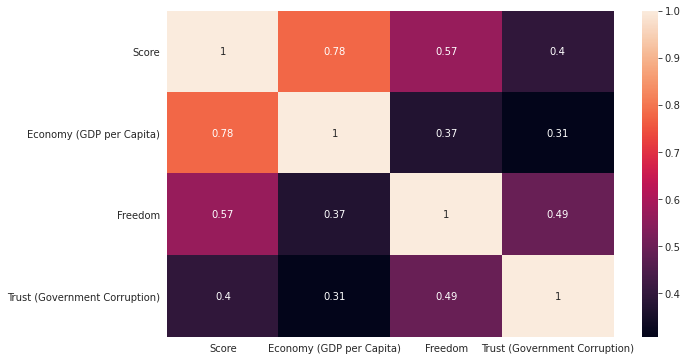

In [13]:
#creating a correlation matrix between numeric columns
c2=y2.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c2,annot=True)

In [14]:
#correlations for 2017 dataset
y1=y1_df.copy()
y1.drop(['Family','life_expectancy','Generosity','dystopia_residual'],axis=1,inplace=True)


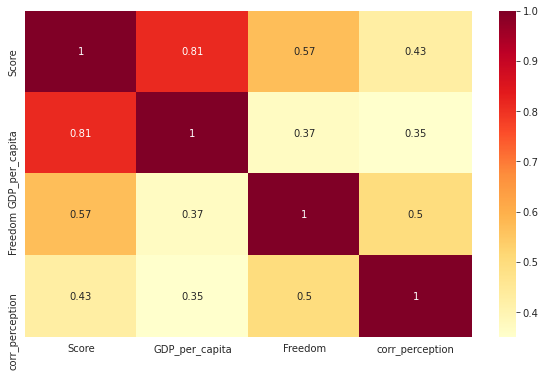

In [15]:
c1=y1.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c1,annot=True,cmap="YlOrRd")

In [16]:
#correlations for 2019 dataset
y3=y3_df.copy()
y3.drop(['Social support',
       'life_expectancy', 'Generosity'],axis=1,inplace=True)

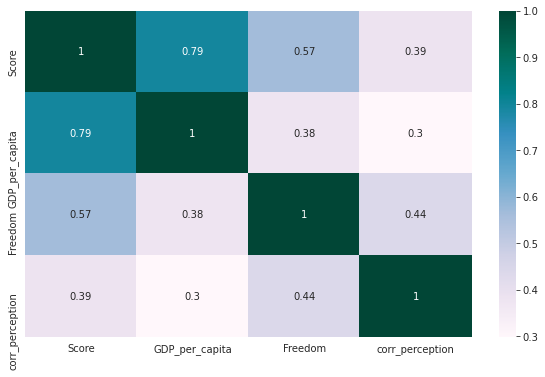

In [17]:
c3=y3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(c3,annot=True,cmap='PuBuGn')

The 3 heatmaps plotted above display correlation matrices between 4 columns, Score, GDP, Freedom and Perception of Corruption corresponding to each of the years 2015,2017,2019. Now the effects of the 3 factors on Score will be discussed.

1. How is GDP related to Happiness Score?

From the heatmaps,Correlation coefficient between GDP_per_capita and Score is ~ 0.79 in all the 3 years indicating a strong positive relationship between the satisfaction of citizens with the GDP and the Happiness score. GDP_per capita is a tracker of the economic growth of a country. People in countries showing positive growth rate of economies tend to be more happier as it leads to higher incomes and better standards of living. Hence, we conclude that the GDP of a country should be one of the top priorities to ensure satisfaction.

2. Relation of Freedom to Happiness Score?

The correlation coefficient between Freedom and Score is exactly 0.57 in all 3 years indicating a moderately positive relationship between the perception of Freedom and the Happiness Score of a country. Generalising this perception of freedom is a hard task because according to [research](https://globescan.com/a-deeper-look-at-freedom-how-perceptions-differ-across-countries-and-groups/) it is different for people belonging to different parts of the world. Nevertheless, it is still a significant contributor to the Happiness Score of a nation.  


3. How does perception of corruption affect the Happiness score?

Correlation coefficient between corr_perception and Score is ~0.4 in all three years. This indicates a weak positive relationship between perception of corruption and the happiness score of a country. 


In [18]:
#creating new datasets comprising of below mentioned columns
x1=y1_df[['Generosity','Family','Score']].copy()
x2=y2_df[['Generosity','Social support','Score']].copy()
x3=y3_df[['Generosity','Social support','Score']].copy()

How does the perception of social state of a country affect its Happiness Score?

To answer this question, we will plot correlation heatmaps of 3 columns from each dataset:
1. Generosity
2. Family
3. Score

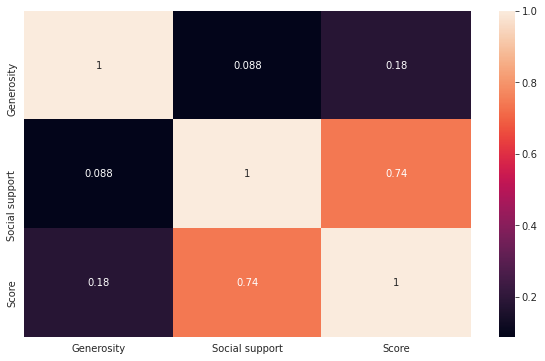

In [19]:
#for year 2015
a2=x2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a2,annot=True)

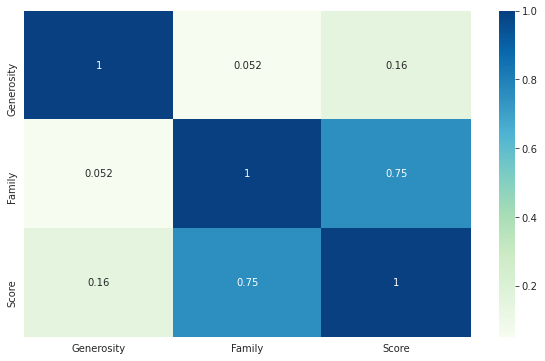

In [20]:
#for year 2017
a1=x1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a1,annot=True,cmap='GnBu')

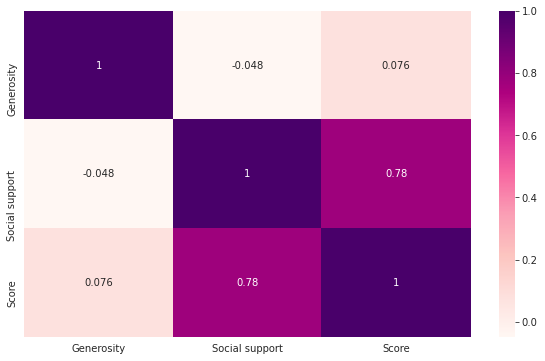

In [21]:
#for year 2019
a3=x3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a3,annot=True,cmap='RdPu')

How do Generosity and Social Support relate to Happiness Score?

Correlation coefficients are observed to be 0.16,0.18 and 0.076 which indicate very weak positive relationship. Not much of a linear change is observed between the two metrics. Generosity is a perception which citizens obtain from each other. On the other hand, correlation values of Social Support with Score are 0.74,0.75 and 0.78 which indicates strong positive relationship. Social support is the perception of how happy people are with their families and friends, acquaintainces, etc.

Since these are the people everyone deals with almost everyday in life, we can consider the perception of Social Support to be a critical factor in determination of Happiness Score.




# Plotting Scatterplots to confirm the correlations observed above

**FOR 2017 DATASET**

<Figure size 720x432 with 0 Axes>

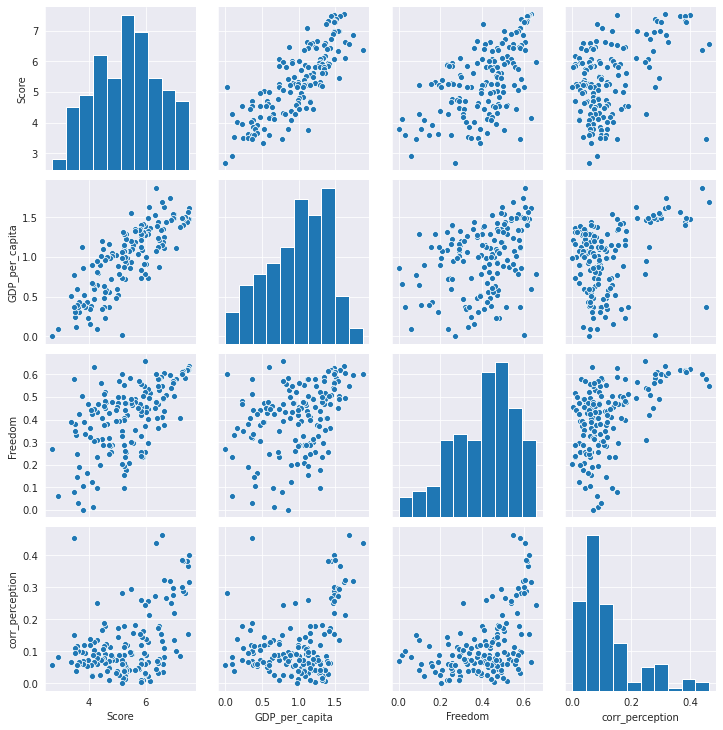

In [23]:
#between GDP_per_capita and Happiness Score for y1_df(2017 dataset)
plt.figure(figsize=(10,6))
sns.pairplot(y1)


**FOR 2015 DATASET**

<Figure size 720x432 with 0 Axes>

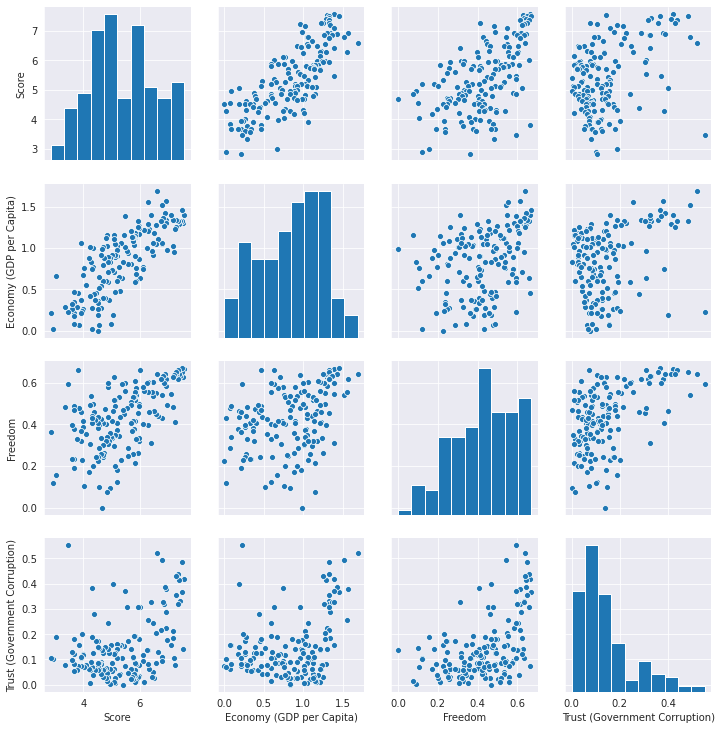

In [24]:
plt.figure(figsize=(10,6))
sns.pairplot(y2)

**FOR 2019 DATASET**

<Figure size 720x432 with 0 Axes>

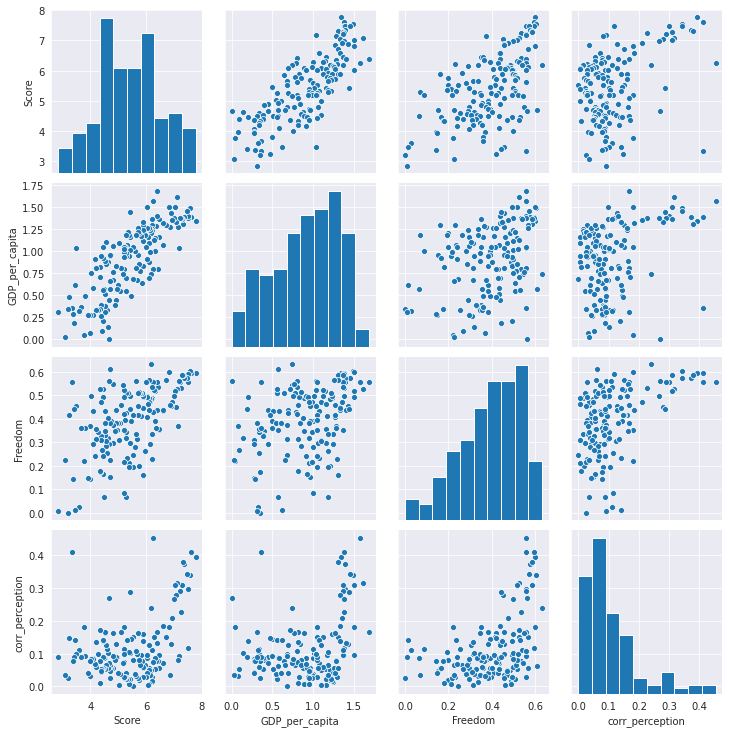

In [25]:
plt.figure(figsize=(10,6))
sns.pairplot(y3)

As we observe in the above scatterplots, the linear relationships described between various factors and the Happiness Score have been justified. Scatter plots are a great source of identifying probable linear relationships between various features and can be used for feature selection.

# Analysing Life Expectancy

Life Expectancy is one of the key metrics for analysing the health of the population of a country. In the case of humans, it is defined as the average amount of time a human is expected to live.

Text(0.5, 1.0, 'Satisfaction with Life expectancy across 2015,2017')

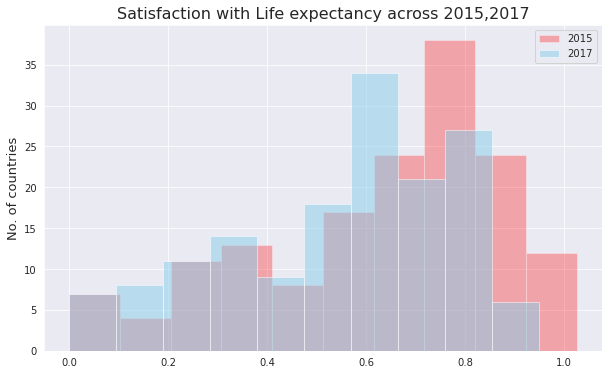

In [26]:
plt.figure(figsize=(10,6))
a=10
plt.hist(y2_df.life_expectancy,a,label='2015',alpha=0.3,color='red')
plt.hist(y1_df.life_expectancy,a,label='2017',alpha=0.5,color='skyblue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title("Satisfaction with Life expectancy across 2015,2017",size=16)

Text(0.5, 1.0, 'Satisfaction with Life expectancy across 2017,2019')

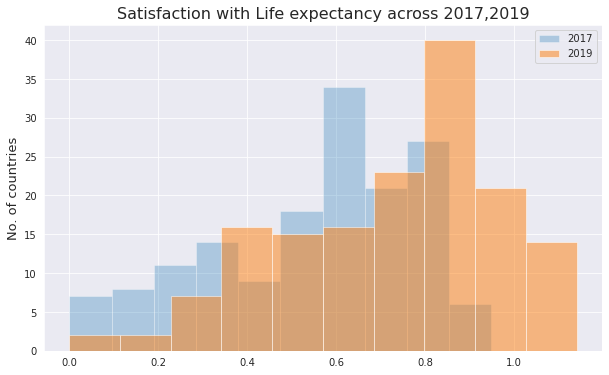

In [27]:
plt.figure(figsize=(10,6))
a=10
plt.hist(y1_df.life_expectancy,a,label='2017',alpha=0.3)
plt.hist(y3_df.life_expectancy,a,label='2019',alpha=0.5)
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title("Satisfaction with Life expectancy across 2017,2019",size=16)

In [28]:
#sorting values in 2017 dataset with ascending values of Life expectancy.
y1_df.sort_values('life_expectancy',axis=0,ascending=True)

,Country,Score,GDP_per_capita,Family,life_expectancy,Freedom,Generosity,corr_perception,dystopia_residual
Happiness.Rank,,,,,,,,,
139,Lesotho,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
106,Sierra Leone,4.709,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,2.668460
155,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
137,Chad,3.936,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238
128,Ivory Coast,4.180,0.603049,0.904780,0.048642,0.447706,0.201237,0.130062,1.844964
...,...,...,...,...,...,...,...,...,...
34,Spain,6.403,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,1.927758
55,South Korea,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
51,Japan,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224


# Analysing countries with lowest and highest life expectancy scores.

We observe that Lesotho has the lowest contribution to its Happiness Score in life expectancy with its score being 0. This is an indicator of the fact that life expectancy is very low in said country. The average life expectancy in Lesotho is 52 years. This statistic is one of the lowest observed in all the countries of the world.

What could be the reasons for this?
* **Uncontrolled Disease spread** : Unavailability of proper health facilities and a doctor to patient ratio of 1:20000 has led to an increase in disease spread. About 20% of people in the country do not have access to clean water source, which consequently also leads to spread of diseases.

* **Unhygienic living conditions**: Lesotho has a very high mortality rate. This is attributed to poor living conditions and the extreme poverty in which majority of the population of Lesotho lives. Inaccessibility to healthcare facilities renders these people helpless.

* **Inadequate source of healthy foods**: Agricultural land covers an extremely small part of Lesotho. This creates food scarcity. Hence consumption of nutrients,vitamins is very low which contributes to the unfortunately low life expectancy of the country.

How is Lesotho being helped by the World?

Sentebale, a non-profit started by Prince Harry, has been providing care to children diagnosed with various diseases and take in orphaned children too. Financing the country would enable them to open more healthcare facilities, ensure a better and cleaner environment for the people, and open educational institutions. 

The country has declared primary education free and this has led to a significant increase in enrollment. Fees of secondary schools are in talks to be lowered as a majority of the people cannot afford to pay it. More educated people would lead to better knowledge and awareness about the environment, diseases and would improve the overall spirit of the country.

Access to clean water is being provided by organisations like the Water Project which builds dams and wells for the people.

It is evident that not just Lesotho, but every underdeveloped country in the world needs help in order to improve the standards of living.


For convenience, we will sort values in 2017 dataset in descending order this time.

In [29]:
y1_df.sort_values('life_expectancy',axis=0,ascending=False)

,Country,Score,GDP_per_capita,Family,life_expectancy,Freedom,Generosity,corr_perception,dystopia_residual
Happiness.Rank,,,,,,,,,
26,Singapore,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.216362
71,"Hong Kong S.A.R., China",5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633
51,Japan,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224
55,South Korea,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
34,Spain,6.403,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,1.927758
...,...,...,...,...,...,...,...,...,...
128,Ivory Coast,4.180,0.603049,0.904780,0.048642,0.447706,0.201237,0.130062,1.844964
137,Chad,3.936,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238
155,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


We observe here that Singapore has the highest life expectancy score. This indicates satisfaction of the people with the life expectancy of their country. Although it is not necessary that longevity leads to more happiness, a majority of the people wish to live longer. Here we look at the factors that increase the longevity of the people.

* Proper healthcare facilities: The government has spent a lot of money in creating high quality healthcare facilities that provide unrestricted access to sanitation. Moreover the advancement in health related technology has benefitted the population.

* Better living conditions: Maintaining hygiene, reduced pollution and access to nutritious foods, keeps the citizens well and healthy.

Last but not the least, the governement has considered health issues a top priority of the country and has been contributing to research and development in the health sector. These are some reasons that has led to an increased longevity of the people.

# Comparing Happiness Scores across regions

In [44]:
#here is the 2015 dataset
y2_df.head(5)

,Country,Region,Score,Economy (GDP per Capita),Social support,life_expectancy,Freedom,Trust (Government Corruption),Generosity,dystopia_residual
Happiness Rank,,,,,,,,,,
1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [55]:
#creating a new series consisting of mean of happiness scores taken across different regions as specified.
#Converting this series into a dataframe
region=y2_df.groupby(['Region']).Score.mean()
region_df=pd.DataFrame(data=region)
reg=region_df.sort_values(by='Score',ascending=False,axis=0)
reg

,Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


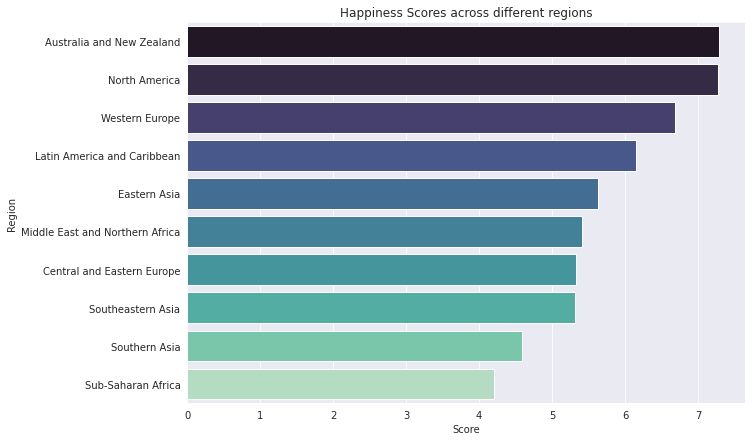

In [57]:
plt.figure(figsize=(10,7))
plt.title('Happiness Scores across different regions')
sns.barplot(x='Score',y=reg.index,data=reg,palette='mako')

From the above barplot we see that countries in North America, Oceania and Western Europe have the highest average happiness scores whereas countries in Sub-Saharan Africa and Asia comprise of the 3 lowest.

# GDP_per_Capita in different regions

In [62]:
#creating a new dataset from y2_df comprising of means of gdp_per_Capita score per region.
gdpc=y2_df.groupby(['Region'])['Economy (GDP per Capita)'].mean()
gdpc_df=pd.DataFrame(data=gdpc)
gdp=gdpc_df.sort_values(by='Economy (GDP per Capita)',ascending=False,axis=0)
gdp

,Economy (GDP per Capita)
Region,
North America,1.360400
Western Europe,1.298596
Australia and New Zealand,1.291880
Eastern Asia,1.151780
Middle East and Northern Africa,1.066973
Central and Eastern Europe,0.942438
Latin America and Caribbean,0.876815
Southeastern Asia,0.789054
Southern Asia,0.560486


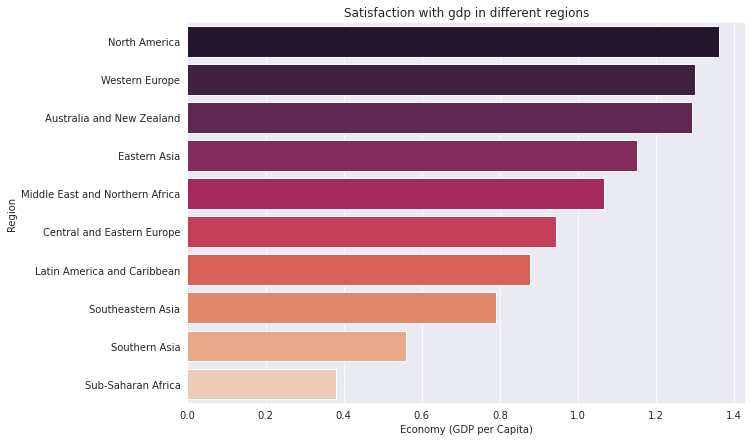

In [67]:
plt.figure(figsize=(10,7))
plt.title('Satisfaction with gdp in different regions')
sns.barplot(x='Economy (GDP per Capita)',y=gdp.index,data=gdp,palette='rocket')

Satisfaction with Economy of the country is observed to be the highest in North America whereas the lowest score is observed in Sub-Saharan Africa. To understand why such varying level of satisfaction is observed across different regions check out [this article](https://progressmichigan.org/2018/07/what-is-a-good-economy-really/)

# Visualisation of trust across different regions

Metric expressing satisfaction of people with their governments

In [72]:
trust=y2_df.groupby(['Region'])['Trust (Government Corruption)'].mean()
trust_df=pd.DataFrame(data=trust)
tru=trust_df.sort_values(by='Trust (Government Corruption)',ascending=False,axis=0)
tru

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
North America,0.244235
Western Europe,0.231463
Middle East and Northern Africa,0.181702
Southeastern Asia,0.151276
Eastern Asia,0.127695
Sub-Saharan Africa,0.123878
Latin America and Caribbean,0.117172
Southern Asia,0.102536


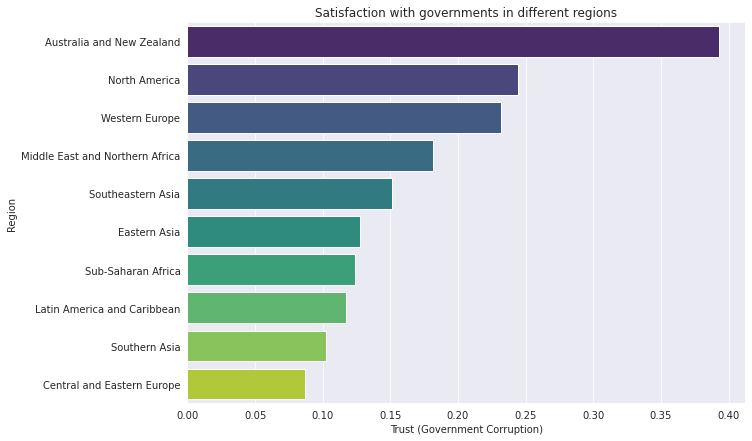

In [78]:
plt.figure(figsize=(10,7))
plt.title('Satisfaction with governments in different regions')
sns.barplot(x='Trust (Government Corruption)',y=tru.index,data=tru,palette='viridis')

This one's quite hard to comment on. But as observed we can see that the Oceania(Australia+New Zealand) has the best trust score. It is evident in the sense that there are hardly any notable governmental issues in those countries. Yes being powerful and rich as a country does matter but if the country is run well enough in all aspects people tend to respect their leaders more.

Which is exactly the case,specially in New Zealand where the PM Jacinda Ardern has been running the country brilliantly. As of 2020, New Zealand was among the few countries which was declared covid-free early in the year. All religions are being respected there with proper education systems and an efficient government.

The bottomost regions in the plot have a very low trust score. This could majorly be associated with unhealthy politics and some instances of corruption inside the governments. Unstable authorities are also a major problem leading to a perception of unreliability.

# Perception of Freedom across different regions

In [80]:
freedom=y2_df.groupby(['Region'])['Freedom'].mean()
freedom_df=pd.DataFrame(data=freedom)
free=freedom_df.sort_values(by='Freedom',ascending=False,axis=0)
free

,Freedom
Region,
Australia and New Zealand,0.645310
North America,0.589505
Southeastern Asia,0.557104
Western Europe,0.549926
Latin America and Caribbean,0.501740
Eastern Asia,0.462490
Southern Asia,0.373337
Sub-Saharan Africa,0.365944
Middle East and Northern Africa,0.361751


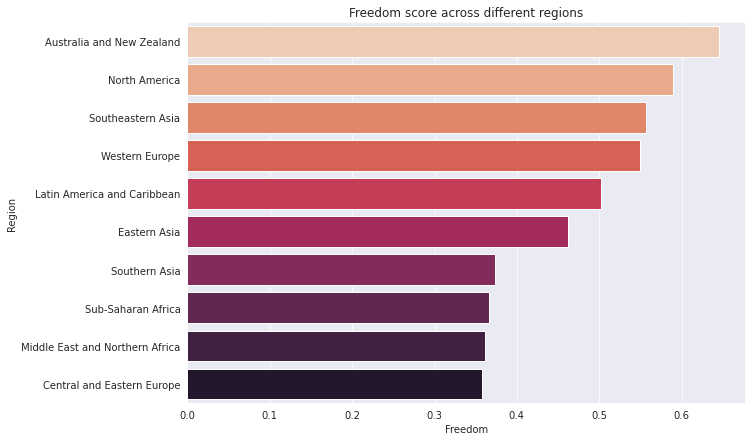

In [82]:
plt.figure(figsize=(10,7))
plt.title('Freedom score across different regions')
sns.barplot(x='Freedom',y=free.index,data=free,palette='rocket_r')

Freedom can be thought of as how liberal are the citizens to exercise the fundamental rights given to them without breaking laws, whether or not they perceive any such oppression on themselves by the authorities.

We observe that Oceania has the highest freedom score and Eastern European countries have the lowest mean freedom scores.